## <center>Közönséges differenciálegyenletek numerikus megoldása</center>




### Kezdetiérték-feladat

\begin{cases}
u'(t)= f(t,u(t)),&t\in[0,T]\\
u(0)=u_0&
\end{cases}


Explicit Euler

\begin{cases}
y_{n+1}=y_{n}+hf(t_n,y_n), n=0,1,\ldots\\
y_0\ \text{adott}
\end{cases}

Tipikusan $y_0=u_0$.

<br>
<b>1.feladat.</b>  Tekintsük az

\begin{cases}
u'(t)= 1-u(t),&t\in[0,1]\\
u(0)=0&
\end{cases}


kezdetiérték-feladatot. Alkalmazzuk a feladatra az explicit Euler módszert az intervallumot $N$ egyenlő részintervallumra bontással! Ábrázoljuk eredményünket!

hiba =  0.0014417


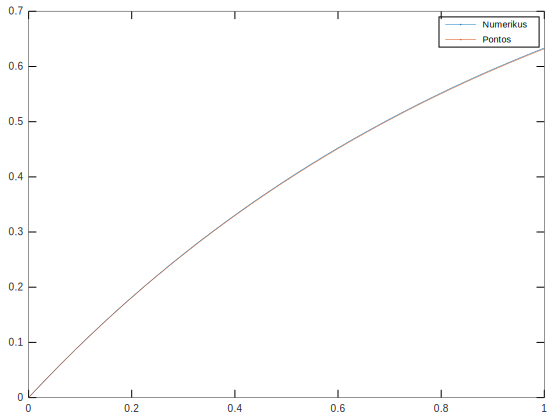

In [12]:
a=0; b=1; y0=0; N=128;
h=(b-a)/N;
t=linspace(a,b,N+1);
y=zeros(1,N+1);
y(1)=y0;
for j=1:N
    y(j+1)=y(j)+h*(1-y(j));
end
%%
egzakt = 1 - exp(-t);
plot(t,y,t,egzakt)
legend('Numerikus', 'Pontos')

hiba = norm(y-egzakt,'inf')

hiba =  0.0014417


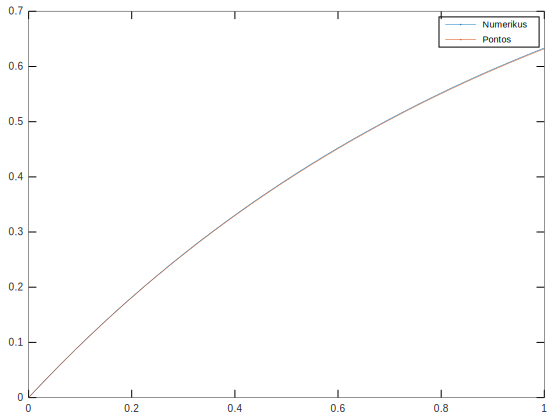

In [16]:

[h,t,y]=ee(@(t,y)(1-y),0,1,0,128);

egzakt = 1 - exp(-t);
plot(t,y,t,egzakt)
legend('Numerikus', 'Pontos')

hiba = norm(y-egzakt,'inf')


<br>
<b>2.feladat.</b>  Tekintsük a járványterjedés legalapvetőbb ún. SIR modelljét, azaz az 

\begin{cases}
S'(t)=-\beta S(t)I(t)\\
I'(t)=\beta S(t)I(t)-\gamma I(t)\\
R'(t)=\gamma I(t)
\end{cases}


rendszert, ahol $S$ a fertőzhetőek (susceptible), $I$ a fertőzöttek (infected) és $R$ a retiráltak (recovered/removed/resistent) száma az időben. A $\beta>0$ paraméter a fertőzési, míg a $\gamma>0$ paraméter a fertőzők eltávolításának rátája.

Tekintsük 1968. decemberének végén New York városát, melyet elért a hongkongi influenza pandémia. Az influenza során 1968 és 1969 között egymillió ember veszítette el életét. Tételezzük fel, hogy  New Yorkban kezdetben 7.9 millió ember volt egészséges, mindössze 10 ember volt fertőzött és 0 retirált volt. Ezeket a kezdeti adatokat normáljuk le az egészséges emberek számával! Adatok alapján $\beta=1/2$ és $\gamma=1/3$ feltételezhető.

Alkalmazzuk a rendszerre az explicit Euler módszer és ábrázoljuk  az egyes osztályok időbeli alakulását látjuk az első 100 napig $N=1000$ részintervallumra osztással.

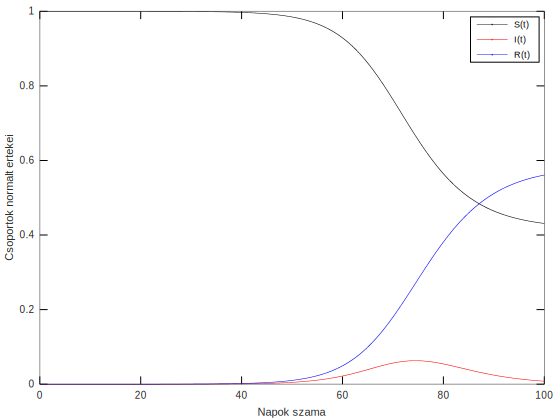

In [10]:
beta=1/2;
gamma=1/3;

[h,t,y]=eesys(@(t,y)[-beta*y(1).*y(2);
                     beta*y(1).*y(2)-gamma*y(2);
                     gamma*y(2)],
                     0,100,[1; 0.00000126582; 0],10000);


plot(t,y(1,:),'k',t,y(2,:),'r',t,y(3,:),'b')
legend('S(t)','I(t)','R(t)')
xlabel('Napok szama')
ylabel('Csoportok normalt ertekei')

<br>
<b>3.feladat.</b> Oldjuk meg az előző feladatot a MATLAB beépített ode45 megoldójával!

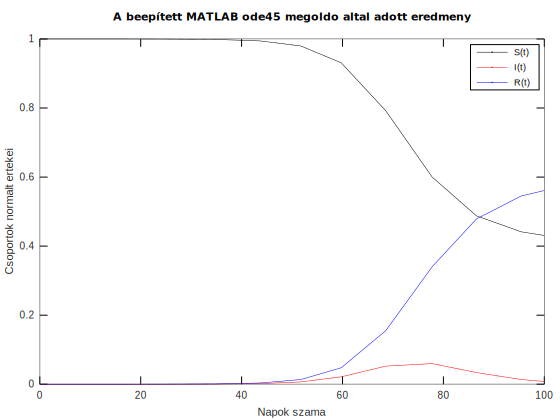

In [9]:
beta=1/2;
gamma=1/3;
[t,y] = ode45(@(t,y) [-beta*y(1)*y(2); beta*y(1)*y(2)-gamma*y(2); gamma*y(2)] ,[0,100],[1; 0.00000126582; 0]);
plot(t,y(:,1),'k',t,y(:,2),'r',t,y(:,3),'b')
legend('S(t)','I(t)','R(t)')
xlabel('Napok szama')
ylabel('Csoportok normalt ertekei')
title('A beepített MATLAB ode45 megoldo altal adott eredmeny')

### Nemlineáris algebrai egyenletek megoldása

Newton-módszer

\begin{cases}
x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}\\
x_0\ \text{adott}
\end{cases}


<br>
<b>4.feladat.</b> Tekintsük az $x^2-x-6=0,\ x\in[1,4]$ egyenletet. Írjunk programot, amely a szokásos $maxit$ és abszolút hiba leállási feltételek mellett közelíti a nemlineáris egyenlét gyökét a Newton-módszerrel.




In [17]:
[k x]=newton('x^2-x-6',2.2,20,1e-3,'2*x-1')

k =  4
x =  3.000000000015012


<br>
<b>5.feladat.</b> Tekintsük az alábbi

$$x_1^2-10x_1+x_2^2+8=0\\
x_1x_2^2+x_1-10x_2+8=0$$

nemlineáris egyenletrendszert a $[-10,\ 10]\times [-10,\ 10]$ négyzeten. Ábrázoljuk külön-külön implicit függvényként!



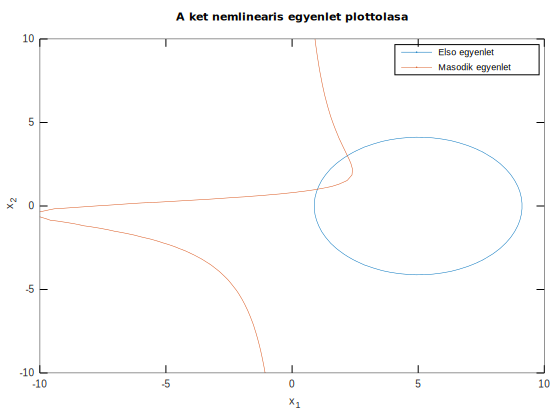

In [18]:


%% MATLAB megvalositas
%f = @(x_1,x_2) x_1.^2-10*x_1+x_2.^2+8;
%fimplicit(f,[-10 10 -10 10]) ...

f = @(x_1,x_2) x_1.^2-10*x_1+x_2.^2+8;
ezplot (f, [-10, 10]);
hold on
g = @(x_1,x_2) x_1.*x_2.^2+x_1-10*x_2+8;
ezplot (g, [-10, 10]);
title('A ket nemlinearis egyenlet plottolasa')
legend('Elso egyenlet','Masodik egyenlet')
hold off





<br>
<b>6.feladat.</b> Alkalmazzuk a beépített <i>fsolve</i> függvényt az előző nemlineáris egyenletrendszer gyökeinek meghatározására!



In [19]:
function y = f (x)
  y = zeros (2, 1);
  y(1) = x(1).^2-10*x(1)+x(2).^2+8;
  y(2) = x(1).*x(2).^2+x(1)-10*x(2)+8;
endfunction

[x] = fsolve (@f, [2; 3])

x =

   2.193439415537146
   3.020466468308315



In [1]:
F = @(x) [x(1).^2-10*x(1)+x(2).^2+8; x(1).*x(2).^2+x(1)-10*x(2)+8];

[y] = fsolve (F, [2; 3])

y =

   2.1934
   3.0205



<br>
<b>7.feladat.</b> Írjunk általános rendszerre vonatkozó Newton-módszer megoldót és alkalmazzuk a 2.feladat egyenletrendszerére!


In [20]:

f=@(x) [x(1).^2-10*x(1)+x(2).^2+8; x(1).*x(2).^2+x(1)-10*x(2)+8];
x=newtonrendszer(f,[2;3],100,1e-4)

x =

   2.193439415537587
   3.020466468308405

